<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 01:  Classification**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
3. [Ejercicio 3.](#eje3)
4. [Ejercicio 4.](#eje4)

In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "ML-20221-Laconga" #@param {type:"string"}
assignment_id = group_id +'.taller_classification'
student_id = "2022146" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
 #@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **Imports**

import scipy.stats as stats
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<br><br><br>

### **Dataset de nacidos vivos en Santander**

Los siguientes ejercicios utilizarán un dataset **basado** en el conjunto de datos abiertos [Nacidos Vivos en Municipio de Bucaramanga enero 2016 a agosto 2021](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Nacidos-Vivos-en-Municipio-de-Bucaramanga-enero-20/x5xp-9w4b). En este dataset se han caracterizado un conjunto de atributos relacionados con los nacimientos en el departamento de Santander, tales como `PESO`, `TALLA`, `TIEMPOGESTACION` entre otros.

(199, 20)


,SEXO,PESO,TALLA,TIEMPOGESTACION,NUMEROCONSULTASPRENATALES,TIPOPARTO,EDADMADRE,NIVELEDUCATIVOMADRE,ULTIMOANOAPROBADOMADRE,MUNICIPIORESIDENCIA,AREARESIDENCIA,NUMEROHIJOSNACIDOSVIVOS,NUMEROEMBARAZOS,REGIMENSEGURIDAD,TIPOADMINISTRADORA,EDADPADRE,NIVELEDUCATIVOPADRE,ULTIMOANOAPROBADOPADRE,CURSODEVIDAMADRE,CURSODEVIDAPADRE
0,1,3670,53,40,6,1,20,2,11,0,0,1,1,2,2,36,2,11,1,2
1,1,2635,50,35,8,2,29,2,11,0,0,1,1,0,0,24,2,11,2,1
2,0,2860,51,36,5,2,39,6,5,0,0,5,7,2,2,45,6,5,2,2


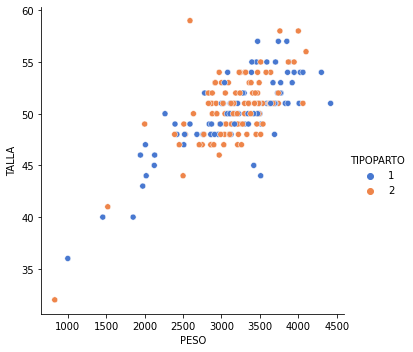

In [ ]:
#@title **Dataset de nacidos vivos en Santander**
variable_x = "PESO" #@param {type:"string"}
variable_y = "TALLA" #@param {type:"string"}
variable_z = "TIPOPARTO" #@param {type:"string"}

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_h = pd.read_csv("https://gitlab.com/gustavogarzonv/sets/-/raw/main/nacidos.csv")
print(data_h.shape)

sns.relplot(x=variable_x, y=variable_y, hue=variable_z, palette="muted", data=data_h);

data_h.head(3)

<br><br><br>

---
# **Ejercicio 1**  <a name="eje1"></a>
---

En este ejercicio se realizará una clasificación según el tipo de parto (`TIPOPARTO`), siendo $1$ cesárea y $0$ parto espontáneo. Para ello, ejecute las siguientes indicaciones:

- Vamos a utilizar como características únicamente a las columnas `PESO`, `TALLA` y `TIEMPOGESTACION`
- Utilice un 80% del dataset para entrenar y un 20% para test. Emplee la función `train_test_split` **desactivando** la opción `shuffle`
- Debe entrenar un estimador `RandomForestClassifier` con parámetros `max_depth`=10 , `n_estimators`=200 y `random_state`=21

- Devuelva el `accuracy_score` para la partición de test

- Devuelva el informe de las métricas del proceso de clasificación utilizando la función `classification_report`

Referencia de la función [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
#@title **code student**
def function_t01(data_h):
    #libraries
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report

    """Put your code here"""

    data = data_h.values[:,[1,2,3]]
    data_y = data_h.values[:,5]
    X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, shuffle=False)
    est = RandomForestClassifier(max_depth=10 , n_estimators=200, random_state=21)
    est.fit(X_train,y_train)
    X_pred=est.predict(X_test)
    a = accuracy_score(X_pred, y_test)
    informe = classification_report(y_test, X_pred)

    return a, informe

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(function_t01)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


---
# **Ejercicio 2**  <a name="eje2"></a>
---

En este ejercicio se realizará una clasificación según el sexo del neonato (`SEXO`), siendo $1$ femenino y $0$ masculino. Para ello, ejecute las siguientes indicaciones:

- Vamos a utilizar como características únicamente a las columnas `PESO`, `TALLA` y `NUMEROCONSULTASPRENATALES`
- Usaremos la modalidad Leave-one-out. Si lo prefiere, puede utilizar la función [LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html) de la librería Scikit-learn
- Debe entrenar un estimador `GaussianNB`

- Devuelva una **lista** con los `accuracy_score` obtenidos en cada iteración
- Devuelva el **promedio** de los `accuracy_score` obtenidos en cada iteración
- Devuelva la **desviación estándar** de los `accuracy_score` obtenidos en cada iteración


Referencia de la función [LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

In [22]:
#@title **code student**
def function_t02(data_h):
    #libraries
    import numpy as np
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import LeaveOneOut

    """Put your code here"""

    data = data_h.values[:,[1,2,4]]
    data_y = data_h.values[:,0]
    loo = LeaveOneOut()
    list_a = []
    for train_index, test_index in loo.split(data):
      X_train, X_test = data[train_index], data[test_index]
      y_train = data_y[train_index]
      y_test = data_y[test_index]
      est = GaussianNB()
      est.fit(X_train,y_train)
      X_pred=est.predict(X_test)
      a = accuracy_score(X_pred, y_test)
      list_a.append(a)
    ap = np.mean(list_a)
    astd = np.std(list_a)

    return list_a, ap, astd

In [23]:
#@title **send your answer**
student_func_str = inspect.getsource(function_t02)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


---
# **Ejercicio 3**  <a name="eje3"></a>
---

En este ejercicio se evaluará el efecto de la variación de valores del parámetro `max_depth` sobre el accuracy, usando el estimador `RandomForestClassifier`. Se deberá realizar una clasificación según el tipo de parto (`TIPOPARTO`), siendo $1$ cesárea y $0$ parto espontáneo. Para ello, ejecute las siguientes indicaciones:

- Vamos a utilizar como características únicamente a las columnas `PESO`, `TALLA` y `TIEMPOGESTACION`
- Emplee el método CrossValidation con `n_splits`=10 folds. **Desactive** la opción `shuffle`
- Debe entrenar un estimador `RandomForestClassifier` con parámetros `n_estimators`=20 y `random_state`=21

- Para dicho estimador, debe **variar** los valores del parámetro `max_depth` entre 1 y 10 (incluyendo los extremos) con incrementos de 1 unidad.

- Devuelva una lista con el valor del **promedio** de los `accuracy_score` obtenidos

- Devuelva una lista con el valor de la **desviación estándar** de los `accuracy_score` obtenidos


In [ ]:
#@title **code student**
def function_t03(data_h):
    #libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer

    """Put your code here"""
    
    data = data_h.values[:,[1,2,3]]
    data_y = data_h.values[:,5]
    list_avg = []
    list_std = []
    
    for i in range(1,11,1):
      est = RandomForestClassifier(n_estimators=20, random_state=21, max_depth = i)
      s = cross_val_score(est, data, data_y, cv=KFold(10, shuffle=False), scoring=make_scorer(accuracy_score))
      list_avg.append(np.mean(s))
      list_std.append(np.std(s))

    return list_avg, list_std

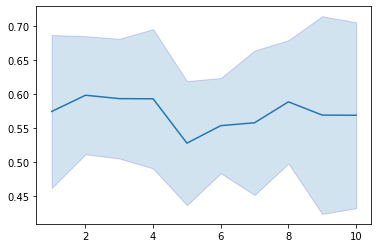

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


In [ ]:
#@title **send your answer**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

avg, std = function_t03(data_h)
plt.plot(range(1, 11, 1), avg)
plt.fill_between(range(1, 11, 1), np.array(avg)-np.array(std), np.array(avg)+np.array(std), alpha=0.2, edgecolor='#1B2ACC')
plt.show()

student_func_str = inspect.getsource(function_t03)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
# **Ejercicio 4**  <a name="eje4"></a>
---

En este ejercicio se evaluará el efecto de la variación de algunos valores del parámetro `kernel` sobre el accuracy, usando el estimador `SVC`. Se deberá realizar una clasificación según el tipo de parto (`TIPOPARTO`), siendo $1$ cesárea y $0$ parto espontáneo. Para ello, ejecute las siguientes indicaciones:

- Vamos a utilizar como características únicamente a las columnas `PESO`, `TALLA` y `TIEMPOGESTACION`
- Utilice un 70% del dataset para entrenar y un 30% para test. Emplee la función `train_test_split` **desactivando** la opción `shuffle`
- Debe entrenar un estimador `SVC` con el parámetro `random_state`=21

- Para dicho estimador, **debe utilizar** los siguientes valores del parámetro `kernel`: `['linear', 'poly', 'rbf', 'sigmoid']`

- Devuelva una lista con el valor de los `accuracy_score` obtenidos


In [ ]:
#@title **code student**
def function_t04(data_h):
    #libraries
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
  
    """Put your code here"""
    
    data = data_h.values[:,[1,2,3]]
    data_y = data_h.values[:,5]
    X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.3, shuffle=False)
    list_a = []
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    for i in kernels:
      est = SVC(kernel = i, random_state=21)
      est.fit(X_train,y_train)
      X_pred=est.predict(X_test)
      a = accuracy_score(X_pred, y_test)
      list_a.append(a)
    
    return list_a, kernels

[0.6833333333333333, 0.7, 0.6333333333333333, 0.6333333333333333]


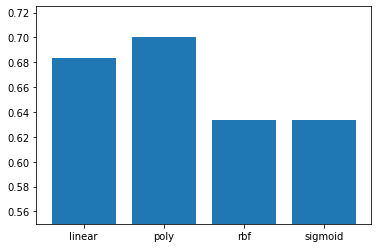

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


In [ ]:
#@title **send your answer**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a, k = function_t04(data_h)
print(a)
plt.bar(k, a, width=0.8)
plt.ylim(0.55, 0.725)
plt.show()

student_func_str = inspect.getsource(function_t04)
r = check_solution_and_evaluate(assignment_id, student_func_str)

<br><br><br>

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>